# 종합실습2 이변량분석(y-숫자) : car seat 매출 분석

* 카시트에 대해서 지역 매장 별 매출액을 예측하고자 합니다.

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

## 1.환경준비

### (1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

### (2) 데이터 로딩

|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	지역별 경쟁사 판매가격(달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부	|	feature	|
|	Income 	|	 지역 주민 평균 소득	|	feature	|
|	Urban 	|	 매장이 도시에 있는지 여부	|	feature	|



In [2]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseats2.csv'
data = pd.read_csv(path)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,Yes,No


In [3]:
target = 'Sales'

## 1.숫자형 X --> Y

* 모든 숫자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : scatter, jointplot  
② 수치화 : 상관분석

### (1) Advertising -> Sales

1) 시각화 : scatter(regplot), jointplot

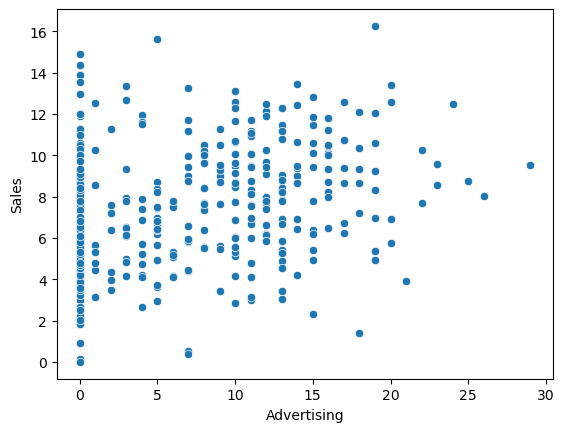

In [4]:
var = 'Advertising'

sns.scatterplot(x=var, y = target, data = data)
plt.show()

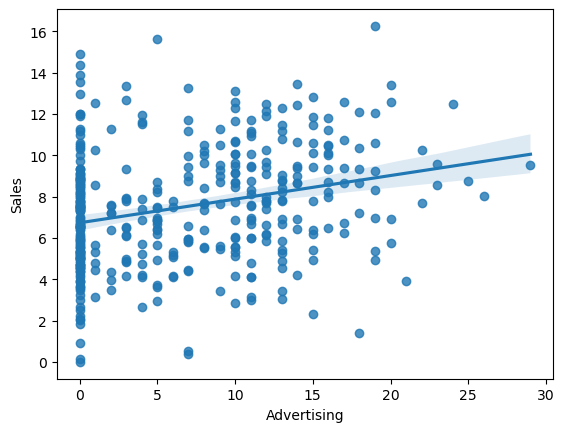

In [5]:
sns.regplot(x=var, y = target, data = data) # 직선식, 회귀식을 찾아줌 흐릿하게 보이는 게 회귀선에 대한 오차범위
plt.show()

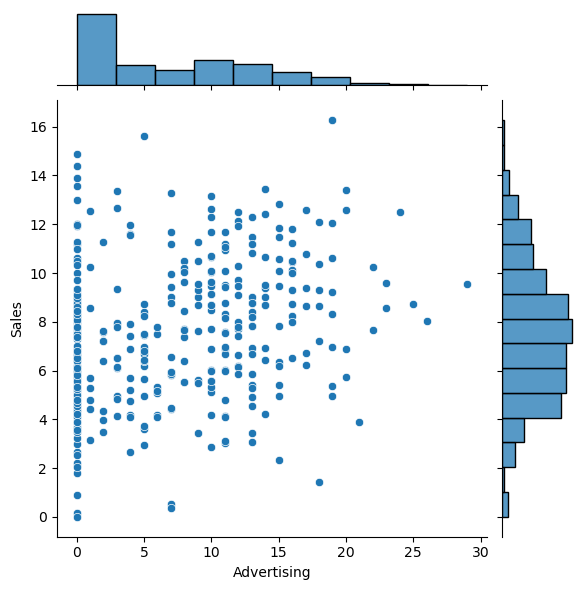

In [6]:
sns.jointplot(x=var, y = target, data = data)
plt.show()

2) 수치화 : 상관분석

In [7]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.269506781376902, p-value : 4.377677110302732e-08


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

* 0을 빼고 다시 해봐야겠어요 (df.loc[])
* 광고와 세일즈는 약한 상관관계가 있다. pv(p-value)로 볼 때 유의미한 값으로 판단됨

### (2) Population -> Sales

1) 시각화 : scatter

In [ ]:
var = 'Population'

In [ ]:
eda2_nn(data, target, var)

2) 수치화 : 상관분석

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

### (3) Price -> Sales

1) 시각화 : scatter

In [ ]:
var = 'Price'

In [ ]:
eda2_nn(data, target, var)

2) 수치화 : 상관분석

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

가격이 높아지면 당연히 판매가 줄어들겠지 
가격대 별 수익액, 수익율 이런 걸 뽑고 비교할 수 있고 이런 걸 기반으로 pricing 가격 결정을 할 수 있음

### (4) Age -> Sales

1) 시각화 : scatter

In [ ]:
eda2_nn(data, 'Sales', 'Age')

2) 수치화 : 상관분석

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

### (5) CompPrice -> Sales

1) 시각화 : scatter

In [ ]:
eda2_nn(data, 'Sales', 'CompPrice')


2) 수치화 : 상관분석

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

가설이 뭐냐면 타사 가격은 -> 자사 판매량에 영향을 줄 거야! 이런 가설이다.
근데 결과 지표를 보면 가설이 꽝이다. 직선을 하나도 예측할 수 없다.
타사 가격에 따라서 판매량이 달라지는 게 우리가 원하던 거 아니었나?
우리는 판매하지만 고객 입장에선 구매를 하는데, 우리는 타사 가격을 보고 판매해요? 아뇨. 철저히 고객 입장에서 생각해야 되는데
고객은 자사제품이 경쟁력이 있을 때, 가성비 있을 때 구매한다.


이것은 가설이 잘못되었기 때문에 우리가 원하는 결과를 얻지 못한 것.
가설을 수정해야 돼!
타사 가격이 아니라, 가격경쟁력이 중요한 거 아니야? 라는 결과를 도출할 수 있음.
타사 가격 - 자사 가격 = 자사경쟁력? 얘가 고객한테 영향을 주는 거 아니야? 추가분석 해보자.

* 드디어 함께 추가 분석!

In [ ]:
data['Diff_Price'] = data['CompPrice'] - data['Price']
data.head()

In [ ]:
eda2_nn(data, 'Sales', 'Price')


In [ ]:
eda2_nn(data, 'Sales', 'CompPrice')


In [ ]:
eda2_nn(data, 'Sales', 'Diff_Price')


관련이 강한 결과다!
기존에 변수에서 관계가 없다고 그냥 넘기지 말고, 그것으로 인해 관점을 바꿔서 
새로운 관계 있는 변수를 만들어내는 것이 피처 엔지니어링 굉장히 중요하다. 

### (6) Income -> Sales

1) 시각화 : scatter

In [ ]:
eda2_nn(data, 'Sales', 'Income')


2) 수치화 : 상관분석

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

지역 평균 소득이 높은 지역의 사람들이 비교적 낮은 사람들과 구매량이 큰 차이가 없는 이유는 아이의 수는 비슷하니 구매량은 큰 차이가 없고 판매된 제품의 가격이 차이가 있을 수도 있다 라고 해석해도 될까요?

## 2.범주형 X --> Y

* 모든 범자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : 평균비교 barplot  
② 수치화 : t-test, anova

### (1) ShelveLoc-> Sales

1) 시각화 : 평균비교 barplot

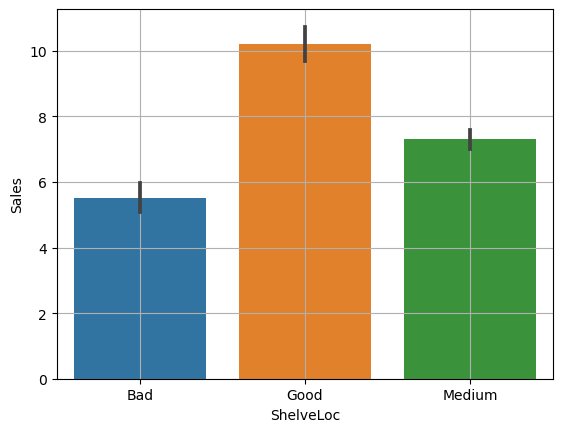

In [6]:
var = 'ShelveLoc'

sns.barplot(x=var, y=target, data = data)
plt.grid()
plt.show()

2) 수치화 : t-test, anova

In [7]:
data[var].unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

In [8]:
d_b = data.loc[data[var]=='Bad', target]
d_m = data.loc[data[var]=='Medium', target]
d_g = data.loc[data[var]=='Good', target]

spst.f_oneway(d_b, d_m, d_g)

F_onewayResult(statistic=92.22990509910348, pvalue=1.26693609015938e-33)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

### (2) Urban -> Sales

1) 시각화 : 평균비교 barplot

In [ ]:
var = 'Urban'
sns.barplot(x=var, y=target, data= data)
plt.grid()
plt.show()

2) 수치화 : t-test, anova

In [ ]:
c1 = data.loc[data[var]=='Yes', target]
c2 = data.loc[data[var]=='No', target]

print(spst.ttest_ind(c1, c2))

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

### (3) US-> Sales

1) 시각화 : 평균비교 barplot

2) 수치화 : t-test, anova

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

## 3.관계 정리하기

① 강한관계

② 중간관계

③ 관계없음